# Import Necessary Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df = pd.read_csv('spam_data.csv')
df.head()

,type,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.shape

(5572, 2)

In [5]:
df

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Checking for Missing Values

In [6]:
# Check for missing values
print(df.isnull().sum())

type       0
message    0
dtype: int64


# Distribution of Spam vs. Ham Messages

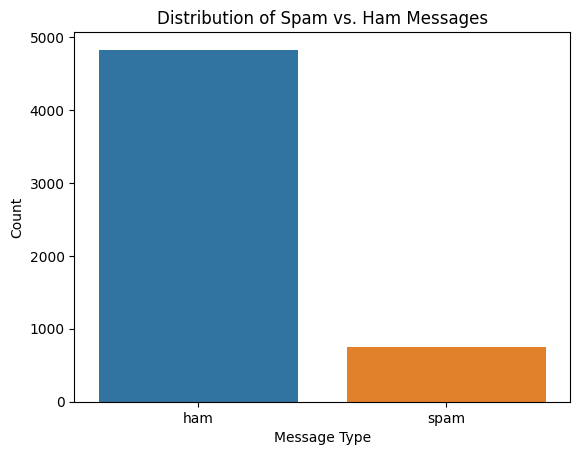

In [7]:
# Countplot for spam vs. ham messages
sns.countplot(data=df, x='type')
plt.title('Distribution of Spam vs. Ham Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()

# Splitting the data into features and target variable

In [8]:
X = df['message']
y = df['type']

In [9]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will �_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [10]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: type, Length: 5572, dtype: object

# TF-IDF Vectorization

In [12]:
#For the machine learning models, we'll need to preprocess the text data by converting it into numerical features. 
#This can be done using techniques like TF-IDF (Term Frequency-Inverse Document Frequency).
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

# Splitting into training and testing sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Logistic Regression

In [14]:
logistic_regression = LogisticRegression(max_iter=1000)

In [15]:
# Training the models
logistic_regression.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [16]:
# Prediction
logistic_regression_pred = logistic_regression.predict(X_test)

In [17]:
# Evaluation
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_pred)

In [18]:
# Print accuracies
print(f"Logistic Regression Accuracy: {logistic_regression_accuracy}")

Logistic Regression Accuracy: 0.9605381165919282


# Support Vector Machines

In [19]:
svm = SVC()

In [20]:
# Training the models
svm.fit(X_train, y_train)

SVC()

In [21]:
# Prediction
svm_pred = svm.predict(X_test)

In [22]:
svm_accuracy = accuracy_score(y_test, svm_pred)

In [23]:
print(f"SVM Accuracy: {svm_accuracy}")

SVM Accuracy: 0.9757847533632287


# Naive Bayes

In [24]:
naive_bayes = MultinomialNB()

In [25]:
# Training the models
naive_bayes.fit(X_train, y_train)

MultinomialNB()

In [26]:
# Prediction
naive_bayes_pred = naive_bayes.predict(X_test)

In [27]:
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_pred)

In [28]:
print(f"Naive Bayes Accuracy: {naive_bayes_accuracy}")

Naive Bayes Accuracy: 0.9623318385650225


# Find the best model

In [29]:
best_model = max(logistic_regression_accuracy, svm_accuracy, naive_bayes_accuracy)

if best_model == logistic_regression_accuracy:
    print("Logistic Regression performs the best.")
elif best_model == svm_accuracy:
    print("SVM performs the best.")
else:
    print("Naive Bayes performs the best.")

SVM performs the best.


# Saving Model as .pkl file

In [30]:
import pickle
pickle.dump(svm,open('finalized_model.pkl','wb'))

In [33]:
pickle.dump(tfidf, open('vectorizor.pkl','wb'))